# Natural Language Processing and WordClouds in Python

Below are the packages used in this demostration

In [3]:
import pandas as pd 
import re 
import nltk
from nltk.corpus import stopwords 
import wordcloud 
import matplotlib.pyplot as plt
import csv

## Obtain the Data

Below we will load are data with help from pathlib

In [4]:
from pathlib import Path
df=pd.read_csv(Path("/home/darrin/Documents/python/Womens_Clothing_E-Commerce_Reviews.csv"))
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


The data above are reviews of womens clothing below is an example of one specific comment

In [5]:
df['Review Text'].head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: Review Text, dtype: object

## Language Processing

There are several changes we need to make to the text for processing. First, we will lowercase all words and remove punctuation as shown below.

In [6]:
df["Review Text"]=df['Review Text'].str.lower() 
df["Review Text"]=df['Review Text'].str.replace(r'[-./?!,":;()\']',' ')

Let's look at the differences

In [7]:
df['Review Text'].head()

0    absolutely wonderful   silky and sexy and comf...
1    love this dress   it s sooo pretty   i happene...
2    i had such high hopes for this dress and reall...
3    i love  love  love this jumpsuit  it s fun  fl...
4    this shirt is very flattering to all due to th...
Name: Review Text, dtype: object

Next we need to remove stop words which are words that dont have signficant meaning in English. To do this we need to download information from the web using nltk.

In [8]:
nltk.download_gui()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


Below we create are stopwords list and add the word 'to' to it

In [9]:
stopwords_list=stopwords.words('english') 
stopwords_list=stopwords_list+['to']

This code is the basically telling Python what to look for. Using regularized expressions Python will look for any word whos pattern on the left is the same as the pattern on the right after the .join function. Inside the .join function is our stopwords_list. We will now take this object called 'pat' and use it on our 'Review Text' variable.

In [10]:
pat = r'\b(?:{})\b'.format('|'.join(stopwords_list))

In [11]:
pat

"\\b(?:i|me|my|myself|we|our|ours|ourselves|you|you're|you've|you'll|you'd|your|yours|yourself|yourselves|he|him|his|himself|she|she's|her|hers|herself|it|it's|its|itself|they|them|their|theirs|themselves|what|which|who|whom|this|that|that'll|these|those|am|is|are|was|were|be|been|being|have|has|had|having|do|does|did|doing|a|an|the|and|but|if|or|because|as|until|while|of|at|by|for|with|about|against|between|into|through|during|before|after|above|below|to|from|up|down|in|out|on|off|over|under|again|further|then|once|here|there|when|where|why|how|all|any|both|each|few|more|most|other|some|such|no|nor|not|only|own|same|so|than|too|very|s|t|can|will|just|don|don't|should|should've|now|d|ll|m|o|re|ve|y|ain|aren|aren't|couldn|couldn't|didn|didn't|doesn|doesn't|hadn|hadn't|hasn|hasn't|haven|haven't|isn|isn't|ma|mightn|mightn't|mustn|mustn't|needn|needn't|shan|shan't|shouldn|shouldn't|wasn|wasn't|weren|weren't|won|won't|wouldn|wouldn't|to)\\b"

Below we implement our pat object and examine the results. The modified data is called Split Text

In [12]:
df['Split Text'] = df['Review Text'].str.replace(pat, '') 
df['Split Text'].head()

0      absolutely wonderful   silky  sexy  comfortable
1    love  dress     sooo pretty    happened  find ...
2       high hopes   dress  really wanted   work   ...
3     love  love  love  jumpsuit    fun  flirty   f...
4     shirt   flattering   due   adjustable front t...
Name: Split Text, dtype: object

Lastly we make our wordcloud

(-0.5, 999.5, 499.5, -0.5)

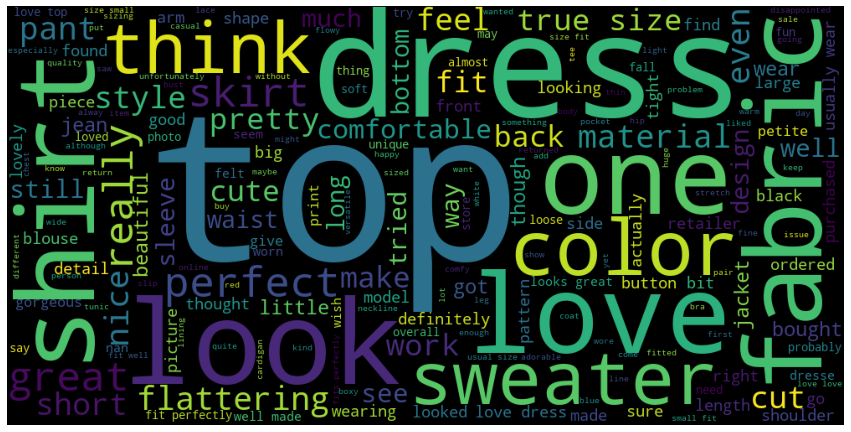

In [13]:
wordcloud1=wordcloud.WordCloud(width=1000,height=500).generate(' '.join(map(str, df['Split Text']))) 
plt.figure(figsize=(15,8)) 
plt.imshow(wordcloud1) 
plt.axis('off')